<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

<h1><center><strong>Feature Engineering</strong></center></h1>

# **Table of Contents**

1. [Introduction](#Section1)<br><br>
2. [Importing Data](#Section2)<br><br>
3. [Dataset Description](#Section3)<br><br>
4. [Exploring Data](#Section4)<br><br>
5. [Feature Engineering](#Section5)<br><br>

<a id = Section1></a>
### **1. Introduction**

- **Feature engineering** is about **creating new input features** from your **existing** ones.

- Feature engineering is the process of **transforming raw data** into **features** that **better represent** the underlying **problem** to the predictive models, resulting in **improved** model **accuracy** on unseen data.

- Feature engineering is **manually designing** what the **input x’s** should be.

<br> 

- **Advantages** of Feature Engineering:

  - Better features means **flexibility**.
  
  - Better features means **simpler models**.
  
  - Better features means **better results**.

<br> 

- It is an **art** like engineering is an art, like programming is an art, like medicine is an art.

  - There are **well defined procedures** that are methodical, provable and understood.

  - The **data** is a **variable** and is **different** every time.
  
  - We get good at **deciding** which **procedures** to use and when, by **practice**.

<br> 

- **Iterative Process** of Feature Engineering:

  - **Brainstorm features**: Really get into the problem, look at a lot of data, study feature engineering on other problems and see what you can steal.
  
  - **Devise features**: Depends on your problem, but you may use automatic feature extraction, manual feature construction and mixtures of the two.
  
  - **Evaluate models**: Estimate model accuracy on unseen data using the features.

<a id = Section2></a>
### **2. Importing Data**

**Downloading the dataset**

In [1]:
!wget https://github.com/insaid2018/Term-2/raw/master/Data/train.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


**Unzipping the dataset**

In [0]:
!unzip -qq train.zip

In [0]:
!ls

campaign_data.csv	   customer_transaction_data.csv  sample_data
coupon_item_mapping.csv    item_data.csv		  train.csv
customer_demographics.csv  __MACOSX			  train.zip


<a id = Section3></a>
### **3. Dataset Description**

#### **Problem Statement:**

- XYZ Credit Card company regularly helps it’s merchants **understand** their **data** better and take key business decisions accurately by providing **machine learning** and **analytics consulting**.

  - ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range.
  
  - As a merchant of XYZ, they have sought XYZ to **assist** them in their **discount marketing** process using the power of machine learning.

- **Discount marketing** and **coupon usage** are very widely used **promotional techniques** to **attract new customers** and to **retain** & **reinforce loyalty** of existing customers.

  - The measurement of a **consumer’s propensity towards coupon usage** and the **prediction** of the **redemption behavior** are crucial parameters in assessing the effectiveness of a marketing campaign.

- ABC’s promotions are shared across various channels including email, notifications, etc.

  - A number of these campaigns include **coupon discounts** that are offered for a specific product/range of products.
  
  - The retailer would like the ability to **predict** whether **customers redeem** the **coupons** received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.

- The data available in this problem contains the following information, including the details of a sample of campaigns and coupons used in previous campaigns:

  - **User Demographic** Details
  
  - **Campaign** and **coupon** Details
  
  - **Product** details
  
  - **Previous transactions**

- Based on previous transaction & performance data from the **last campaigns**, **predict** the probability for the **next campaigns** for each **coupon** and **customer combination**, whether the **customer** will **redeem** the coupon or not?

#### **Description:**

- Here is the **schema** for the different data tables available.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/dataset_schema.png" width="1000"/></center>

`train.csv:` Train data containing the **coupons offered** to the given customers under the campaigns.

| **Variable**      | **Definition**                                          |
| :---------------: | :-----------------------------------------------------: |
| id                | Unique id for coupon customer impression                |
| campaign_id       | Unique id for a discount campaign                       |
| coupon_id         | Unique id for a discount coupon                         |
| customer_id       | Unique id for a customer                                |
| redemption_status | (Target) (0 - Coupon not redeemed, 1 - Coupon redeemed) |

<br> 

`campaign_data.csv:` **Campaign information** for each of the campaigns.

| **Variable**  | **Definition**                    |
| :-----------: | :-------------------------------: |
| campaign_id   | Unique id for a discount campaign |
| campaign_type | Anonymized Campaign Type (X/Y)    |
| start_date    | Campaign Start Date               |
| end_date      | Campaign End Date                 |

<br> 

`coupon_item_mapping.csv:` **Mapping** of **coupon and items** valid for discount under that coupon.

| **Variable** | **Definition**                                               |
| :----------: | :----------------------------------------------------------: |
| coupon_id    | Unique id for a discount coupon (no order)                   |
| item_id      | Unique id for items for which given coupon is valid (no order) |

<br> 

`customer_demographics.csv:` **Customer demographic information** for some customers.

| **Variable**   | **Definition**                                               |
| :------------: | :----------------------------------------------------------: |
| customer_id    | Unique id for a customer                                     |
| age_range      | Age range of customer family in years                        |
| marital_status | Married/Single                                               |
| rented         | 0 - not rented accommodation, 1 - rented accommodation       |
| family_size    | Number of family members                                     |
| no_of_children | Number of children in the family                             |
| income_bracket | Label Encoded Income Bracket (Higher income corresponds to higher number) |

<br> 

`customer_transaction_data.csv:` **Transaction data** for all customers for duration of campaigns in the data.

| **Variable**    | **Definition**                                               |
| :-------------: | :----------------------------------------------------------: |
| date            | Date of Transaction                                          |
| customer_id     | Unique id for a customer                                     |
| item_id         | Unique id for item                                           |
| quantity        | quantity of item bought                                      |
| selling_price   | Sales value of the transaction                               |
| other_discount  | Discount from other sources such as manufacturer coupon/loyalty card |
| coupon_discount | Discount availed from retailer coupon                        |

<br> 

`item_data.csv:` **Item information** for each item sold by the retailer.

| Variable   | Definition                     |
| :--------: | :----------------------------: |
| item_id    | Unique id for item             |
| brand      | Unique id for item brand       |
| brand_type | Brand Type (local/Established) |
| category   | Item Category                  |


#### **Loading Data**

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime

In [0]:
train = pd.read_csv('train.csv')
campaign_data = pd.read_csv('campaign_data.csv')
coupon_item_mapping = pd.read_csv('coupon_item_mapping.csv')
customer_demographics = pd.read_csv('customer_demographics.csv')
customer_transaction_data = pd.read_csv('customer_transaction_data.csv')
item_data = pd.read_csv('item_data.csv')

In [0]:
print('train :', train.shape)
print('campaign_data :', campaign_data.shape)
print('coupon_item_mapping :', coupon_item_mapping.shape)
print('customer_demographics :', customer_demographics.shape)
print('customer_transaction_data :', customer_transaction_data.shape)
print('item_data :', item_data.shape)

train : (78369, 5)
campaign_data : (28, 4)
coupon_item_mapping : (92663, 2)
customer_demographics : (760, 7)
customer_transaction_data : (1324566, 7)
item_data : (74066, 4)


<a id = Section4></a>
### **4. Exploring Data**

#### **Train Data**

In [0]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


#### **Campaign Data**

In [0]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [0]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


#### **Coupon Item Mapping**

In [0]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [0]:
coupon_item_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


#### **Customer Demographics**

In [0]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [0]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


#### **Customer Transaction Data**

In [0]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [0]:
customer_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


#### **Item Data**

In [0]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [0]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


<a id = Section5></a>
### **5. Feature Engineering**

**Note:** We will only be focussing on **creating new features** out of the existing features in this notebook.

#### **Working with Campaign Data**

- Creating new features using the `start_date` and `end_date` features of **campaign_data**.

- First, we need to **convert** our `start_date` and `end_date` columns from **object** dtype to **datetime** dtype.

In [0]:
campaign_data['start_date'] = pd.to_datetime(campaign_data['start_date'], format='%d/%m/%y', dayfirst=True)
campaign_data['end_date'] = pd.to_datetime(campaign_data['end_date'], format='%d/%m/%y', dayfirst=True)

- Our new features show the **time between** the **start** and **end dates** of each campaign on the basis of **days**, **months**, and **weeks**.

In [0]:
campaign_data['diff_d'] = (campaign_data['end_date'] - campaign_data['start_date']) / np.timedelta64(1, 'D')
campaign_data['diff_m'] = (campaign_data['end_date'] - campaign_data['start_date']) / np.timedelta64(1, 'M')
campaign_data['diff_w'] = (campaign_data['end_date'] - campaign_data['start_date']) / np.timedelta64(1, 'W')

In [0]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date,diff_d,diff_m,diff_w
0,24,Y,2013-10-21,2013-12-20,60.0,1.971293,8.571429
1,25,Y,2013-10-21,2013-11-22,32.0,1.051356,4.571429
2,20,Y,2013-09-07,2013-11-16,70.0,2.299842,10.000000
3,23,Y,2013-10-08,2013-11-15,38.0,1.248486,5.428571
4,21,Y,2013-09-16,2013-10-18,32.0,1.051356,4.571429


#### **Merging the Campaign Data with Train Data**

- We are **merging train** data with **campaign** data on `campaign_id`, performing a **left** join.

In [0]:
df = train.merge(campaign_data, on='campaign_id', how='left')
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,diff_w
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143


In [0]:
df.shape

(78369, 11)

#### **Merging Item Data and Coupon Item Mapping Data**

In [0]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


- Printing the **number of distinct values** in different item data columns.

In [0]:
for j in ['brand', 'brand_type', 'category']:
    print(j, ':', item_data[j].nunique())

brand : 5528
brand_type : 2
category : 19


- **Converting** the **dtype** of categorical features to **category** dtype.

In [0]:
for j in ['brand', 'brand_type', 'category']:
    item_data[j] = item_data[j].astype('category')

- We are **merging coupon_item_mapping** data with **item** data on `item_id`, performing a **left** join.

In [0]:
coupon_item_mapping = coupon_item_mapping.merge(item_data, on='item_id', how='left')

In [0]:
coupon_item_mapping.coupon_id.nunique()

1116

In [0]:
coupon_item_mapping.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [0]:
coupon_item_mapping.shape

(92663, 5)

#### **Working with Customer Transaction Data**

- **Converting** `date` column from **object** dtype to **datetime** dtype.

In [0]:
customer_transaction_data['date'] = pd.to_datetime(customer_transaction_data['date'], format='%Y-%m-%d')

- We are extracting **day**, **month** and **week** information from `date` as separate features.

In [0]:
customer_transaction_data['date_d'] = customer_transaction_data['date'].dt.day.astype('category')
customer_transaction_data['date_m'] = customer_transaction_data['date'].dt.month.astype('category')
customer_transaction_data['date_w'] = customer_transaction_data['date'].dt.week.astype('category')

In [0]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,2,1,1
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,2,1,1
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,2,1,1


In [0]:
customer_transaction_data[customer_transaction_data['quantity'] == 20]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w
2257,2012-01-11,632,36682,20,156.73,-21.37,0.0,11,1,2
30413,2012-02-22,1324,9561,20,626.91,-505.80,0.0,22,2,8
35980,2012-02-28,757,25460,20,118.61,-2.49,0.0,28,2,9
60726,2012-03-17,1239,18151,20,142.48,0.00,0.0,17,3,11
82841,2012-03-31,767,37397,20,277.84,0.00,0.0,31,3,13
...,...,...,...,...,...,...,...,...,...,...
1280892,2013-06-16,1483,20360,20,142.48,0.00,0.0,16,6,24
1281796,2013-06-17,811,5873,20,121.11,0.00,0.0,17,6,25
1285318,2013-06-18,132,20360,20,142.48,0.00,0.0,18,6,25
1309218,2013-06-28,362,72255,20,71.24,-35.62,0.0,28,6,26


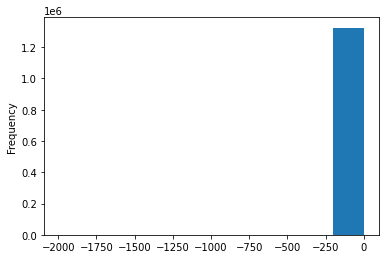

In [0]:
customer_transaction_data['coupon_discount'].plot(kind='hist')

- Creating some **new features** using different features in the transaction data.

- The `discount_bin` feature will tell **whether** a coupon **discount** is **applied** or not.

In [0]:
customer_transaction_data['discount_bin'] = customer_transaction_data['coupon_discount'].apply(lambda x: 0 if x>=0 else 1)

- Calculating the `marked_price` of each item using **selling price**, and **all discounts availed** on that item. 

In [0]:
customer_transaction_data['marked_price'] = customer_transaction_data['selling_price'] - customer_transaction_data['other_discount'] - customer_transaction_data['coupon_discount']

- Creating a feature `disc_percent` containing **discount percentage** on each transaction.

In [0]:
customer_transaction_data['disc_percent'] = (customer_transaction_data['marked_price'] - customer_transaction_data['selling_price']) / customer_transaction_data['selling_price']

- Calculating the **unit price** of each item in a transaction in `price_per_quan`.

In [0]:
customer_transaction_data['price_per_quan'] = customer_transaction_data['marked_price'] / customer_transaction_data['quantity']

- The `marked_by_sale` feature will show the `ratio` of **marked price** and the **selling price**.

In [0]:
customer_transaction_data['marked_by_sale'] = customer_transaction_data['marked_price'] / customer_transaction_data['selling_price']

In [0]:
customer_transaction_data.columns

Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount', 'date_d', 'date_m', 'date_w',
       'discount_bin', 'marked_price', 'disc_percent', 'price_per_quan',
       'marked_by_sale'],
      dtype='object')

#### **Merging Customer Transaction Data with Coupon Item Mapping Data**

- We are **merging customer_transaction_data** data with **coupon_item_mapping** data on `item_id`, performing a **left** join.

In [0]:
customer_transaction_data = customer_transaction_data.merge(coupon_item_mapping, on='item_id', how='left')
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,discount_bin,marked_price,disc_percent,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,7.0,56,Local,Natural Products
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,20.0,56,Local,Natural Products
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,29.0,56,Local,Natural Products
3,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,7.0,56,Local,Natural Products
4,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,20.0,56,Local,Natural Products


In [0]:
print(customer_transaction_data.shape)

(2657495, 19)


In [0]:
customer_transaction_data = customer_transaction_data[customer_transaction_data.duplicated() == False]

In [0]:
print(customer_transaction_data.shape, df.shape)

(2650887, 19) (78369, 11)


#### **Creating New Features Using Aggregations On Customer Transaction Data**

- We are creating `coupon_aquired`, `item_bought`, `tot_disc` features using **count**, and **sum** aggregations on `coupon_id`, `item_id`, and `disc_percent` after **grouping** the **customer_transaction_data** by `customer_id` and `date`.

In [0]:
customer_transaction_data.groupby(['customer_id', 'date']).agg({'coupon_id':'count', 'item_id':'count', 'disc_percent':sum}).reset_index().rename(columns={'coupon_id':'coupon_aquired', 'item_id':'item_bought', 'disc_percent':'tot_disc'})

,customer_id,date,coupon_aquired,item_bought,tot_disc
0,1,2012-02-21,54,66,17.314655
1,1,2012-03-08,18,23,9.429440
2,1,2012-03-29,16,19,7.861163
3,1,2012-04-04,25,37,10.453435
4,1,2012-04-11,36,41,17.355407
...,...,...,...,...,...
142440,1582,2013-06-09,23,25,13.813049
142441,1582,2013-06-10,0,1,0.039292
142442,1582,2013-06-17,39,42,14.819771
142443,1582,2013-06-20,16,19,4.303713


#### **Merging Customer Transaction Data with Aggregated Feature Data**

- We are **merging customer_transaction_data** data with **aggregated feature** data on `customer_id` and `date`, performing a **left** join.

In [0]:
customer_transaction_data = customer_transaction_data.merge(customer_transaction_data.groupby(['customer_id', 'date']).agg({'coupon_id':'count', 'item_id':'count', 'disc_percent':sum}).reset_index().rename(columns={'coupon_id':'coupon_aquired', 'item_id':'item_bought', 'disc_percent':'tot_disc'}), on=['customer_id', 'date'], how='left')

In [0]:
customer_transaction_data[(customer_transaction_data['customer_id']==1052) & (customer_transaction_data['coupon_id']==21)]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,discount_bin,marked_price,disc_percent,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category,coupon_aquired,item_bought,tot_disc
184957,2012-04-05,1052,13774,1,35.62,-31.70,0.00,5,4,14,0,67.32,0.889949,67.32,1.889949,21.0,56,Local,Grocery,26,32,8.928818
184966,2012-04-05,1052,30293,1,35.26,0.00,0.00,5,4,14,0,35.26,0.000000,35.26,1.000000,21.0,56,Local,Grocery,26,32,8.928818
184970,2012-04-05,1052,5207,1,106.86,-21.02,0.00,5,4,14,0,127.88,0.196706,127.88,1.196706,21.0,681,Established,Grocery,26,32,8.928818
184973,2012-04-05,1052,9571,1,106.86,-21.02,0.00,5,4,14,0,127.88,0.196706,127.88,1.196706,21.0,681,Established,Grocery,26,32,8.928818
184978,2012-04-05,1052,47434,1,106.86,-21.02,0.00,5,4,14,0,127.88,0.196706,127.88,1.196706,21.0,681,Established,Grocery,26,32,8.928818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594456,2013-06-22,1052,27522,1,110.07,0.00,0.00,22,6,25,0,110.07,0.000000,110.07,1.000000,21.0,634,Established,Grocery,33,34,14.583416
2594461,2013-06-22,1052,36578,1,17.81,-10.33,0.00,22,6,25,0,28.14,0.580011,28.14,1.580011,21.0,1337,Established,Grocery,33,34,14.583416
2594464,2013-06-22,1052,47434,1,99.38,-28.50,0.00,22,6,25,0,127.88,0.286778,127.88,1.286778,21.0,681,Established,Grocery,33,34,14.583416
2623916,2013-06-28,1052,5859,3,39.18,-30.99,-14.25,28,6,26,1,84.42,1.154671,28.14,2.154671,21.0,1337,Established,Grocery,24,30,10.206436


- Creating `coupon_to_item` feature showing the **difference** between `item_bought` and `coupon_acquired`.

In [0]:
customer_transaction_data['coupon_to_item'] = customer_transaction_data['item_bought'] - customer_transaction_data['coupon_aquired']

In [0]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,discount_bin,marked_price,disc_percent,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category,coupon_aquired,item_bought,tot_disc,coupon_to_item
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,7.0,56,Local,Natural Products,11,12,3.403242,1
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,20.0,56,Local,Natural Products,11,12,3.403242,1
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,29.0,56,Local,Natural Products,11,12,3.403242,1
3,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,7.0,56,Local,Natural Products,11,12,3.403242,1
4,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,20.0,56,Local,Natural Products,11,12,3.403242,1


#### **Merging Train Data with Customer Transaction Data**

In [0]:
customer_transaction_data.columns

Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount', 'date_d', 'date_m', 'date_w',
       'discount_bin', 'marked_price', 'disc_percent', 'price_per_quan',
       'marked_by_sale', 'coupon_id', 'brand', 'brand_type', 'category',
       'coupon_aquired', 'item_bought', 'tot_disc', 'coupon_to_item'],
      dtype='object')

In [0]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,diff_w
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143


- We are **aggregating** features using **count**, **sum**, and **mean** aggregations on `discount_bin`, `quantity`, `item_id`, `coupon_acquired`, `item_bought`, and `tot_disc` after **grouping** the **customer_transaction_data** by `customer_id` and `date`.

In [0]:
customer_transaction_data.groupby(['customer_id','coupon_id']).agg({'date':set, 'discount_bin':sum, 'quantity':sum, 'item_id':'count', 'coupon_aquired':sum, 'item_bought':'mean', 'tot_disc':sum}).reset_index()

,customer_id,coupon_id,date,discount_bin,quantity,item_id,coupon_aquired,item_bought,tot_disc
0,1,1.0,"{2012-10-18 00:00:00, 2013-03-12 00:00:00}",0,2,2,104,70.500000,38.398568
1,1,6.0,"{2012-11-20 00:00:00, 2012-02-21 00:00:00, 201...",2,41,39,1796,60.025641,584.441750
2,1,7.0,"{2012-11-20 00:00:00, 2012-12-18 00:00:00, 201...",0,13,13,602,60.692308,166.241801
3,1,8.0,"{2012-11-20 00:00:00, 2012-02-21 00:00:00, 201...",8,90,82,3406,54.402439,1044.053652
4,1,9.0,"{2012-11-20 00:00:00, 2012-02-21 00:00:00, 201...",1,50,49,1835,48.632653,577.328497
...,...,...,...,...,...,...,...,...,...
226593,1582,1073.0,{2012-11-21 00:00:00},1,1,1,82,87.000000,28.240933
226594,1582,1074.0,{2012-11-21 00:00:00},1,1,1,82,87.000000,28.240933
226595,1582,1075.0,{2012-11-14 00:00:00},0,1,1,32,42.000000,8.488823
226596,1582,1081.0,"{2013-01-11 00:00:00, 2012-12-28 00:00:00, 201...",0,18,6,217,41.500000,64.110056


- We are **merging train** data with **aggregated customer_transaction_data** data on `customer_id` and `coupon_id`, performing a **left** join.

- This will create a **new dataframe** **`ddf`** which will help us **create** a **new feature** `within_date` in the **`df`** dataframe.

In [0]:
ddf = df.merge(customer_transaction_data.groupby(['customer_id','coupon_id']).agg({'date':set, 'discount_bin':sum, 'quantity':sum, 'item_id':'count', 'coupon_aquired':sum, 'item_bought':'mean', 'tot_disc':sum}).reset_index(), on=['customer_id', 'coupon_id'], how='left')

In [0]:
ddf.sample(10)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,diff_w,within_date,date,discount_bin,quantity,item_id,coupon_aquired,item_bought,tot_disc
56432,92786,13,146,140,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60060,98665,8,100,1335,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45177,74064,29,597,398,0,Y,2012-10-08,2012-11-30,53.0,1.741309,7.571429,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12148,20056,8,247,541,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77418,127054,13,156,390,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41540,68174,8,747,1434,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24917,40907,8,942,1246,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55007,90415,8,293,763,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32121,52647,8,13,119,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11094,18330,11,1012,1144,0,Y,2013-04-22,2013-06-07,46.0,1.511325,6.571429,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print(ddf.shape)

(78369, 19)


In [0]:
ddf['date'].replace(np.nan, 0, inplace=True)
ddf['discount_bin'].replace(np.nan, -1, inplace=True)

In [0]:
ddf.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,diff_w,within_date,date,discount_bin,quantity,item_id,coupon_aquired,item_bought,tot_disc
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,0,-1.0,NaN,NaN,NaN,NaN,NaN
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,0,-1.0,NaN,NaN,NaN,NaN,NaN
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429,0,0,-1.0,NaN,NaN,NaN,NaN,NaN
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,0,0,-1.0,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,0,0,-1.0,NaN,NaN,NaN,NaN,NaN


- **Creating** `within_date` feature in the **`df`** dataframe using the `date` column of **`ddf`** dataframe.

In [0]:
df['within_date'] = ddf['date'].apply(lambda x: len(x) if x !=0 else 0)

#### **Creating New Dataframe Performing Aggregations On Customer Transaction Data**

- We will create a new dataframe **`trans`** consisting of various **features created** by performing numerous **aggregations** on features of **customer_transaction_data**.

In [0]:
# Specifying aggregations
c = ['count', 'nunique']
n = ['mean', 'max', 'min', 'sum', 'std']
nn = ['mean', 'max', 'min', 'sum', 'std', 'quantile']

In [0]:
# Mapping aggregations with feature name
agg_c = {'date_d': c, 'date_m': c, 'date_w': c, 'quantity': n, 'selling_price': n, 'other_discount': n, 'coupon_discount': n, 'item_id': c,
         'brand': c, 'category': c, 'coupon_id': c, 'discount_bin': nn, 'marked_price': n, 'disc_percent': n, 'price_per_quan': n,
         'brand_type': c, 'marked_by_sale': n, 'coupon_aquired': nn, 'item_bought': nn, 'tot_disc': n, 'coupon_to_item':nn}


In [0]:
# Creating new dataframe after applying aggregations on customer_transaction_data
trans = customer_transaction_data.groupby(['customer_id']).agg(agg_c)
trans.head()

date_d         date_m          ... coupon_to_item                          
             count nunique  count nunique  ...            min    sum       std quantile
customer_id                                ...                                         
1             2206      28   2206      12  ...              0  29287  5.671542     14.0
2              823      19    823      11  ...              0   6431  6.097201      6.0
3             1351      23   1351      12  ...              0  18860  9.525554     12.0
4              451      23    451      11  ...              0   2875  4.604267      4.0
5             1594      31   1594      12  ...              0   3944  2.351349      2.0

[5 rows x 85 columns]

- **Flattening** the **multi-index** of **`trans`** dataframe, and adding **F_** at the **beginning** of each feature name, and **join** each aggregation name with each feature name using **_**

In [0]:
trans.columns = ['F_' + '_'.join(col).strip() for col in trans.columns.values]
trans.reset_index(inplace=True)
trans.head()

,customer_id,F_date_d_count,F_date_d_nunique,F_date_m_count,F_date_m_nunique,F_date_w_count,F_date_w_nunique,F_quantity_mean,F_quantity_max,F_quantity_min,F_quantity_sum,F_quantity_std,F_selling_price_mean,F_selling_price_max,F_selling_price_min,F_selling_price_sum,F_selling_price_std,F_other_discount_mean,F_other_discount_max,F_other_discount_min,F_other_discount_sum,F_other_discount_std,F_coupon_discount_mean,F_coupon_discount_max,F_coupon_discount_min,F_coupon_discount_sum,F_coupon_discount_std,F_item_id_count,F_item_id_nunique,F_brand_count,F_brand_nunique,F_category_count,F_category_nunique,F_coupon_id_count,F_coupon_id_nunique,F_discount_bin_mean,F_discount_bin_max,F_discount_bin_min,F_discount_bin_sum,F_discount_bin_std,...,F_disc_percent_mean,F_disc_percent_max,F_disc_percent_min,F_disc_percent_sum,F_disc_percent_std,F_price_per_quan_mean,F_price_per_quan_max,F_price_per_quan_min,F_price_per_quan_sum,F_price_per_quan_std,F_brand_type_count,F_brand_type_nunique,F_marked_by_sale_mean,F_marked_by_sale_max,F_marked_by_sale_min,F_marked_by_sale_sum,F_marked_by_sale_std,F_coupon_aquired_mean,F_coupon_aquired_max,F_coupon_aquired_min,F_coupon_aquired_sum,F_coupon_aquired_std,F_coupon_aquired_quantile,F_item_bought_mean,F_item_bought_max,F_item_bought_min,F_item_bought_sum,F_item_bought_std,F_item_bought_quantile,F_tot_disc_mean,F_tot_disc_max,F_tot_disc_min,F_tot_disc_sum,F_tot_disc_std,F_coupon_to_item_mean,F_coupon_to_item_max,F_coupon_to_item_min,F_coupon_to_item_sum,F_coupon_to_item_std,F_coupon_to_item_quantile
0,1,2206,28,2206,12,2206,38,1.133726,5,1,2501,0.454532,94.922085,445.25,12.11,209398.12,53.310302,-20.228314,0.0,-372.23,-44623.66,36.111393,-1.864565,0.0,-106.86,-4113.23,8.521853,2206,463,1665,76,1665,6,1665,159,0.071623,1,0,158,0.257921,...,0.238737,1.792027,0.0,526.654601,0.286794,104.370662,494.76,12.110000,230241.681167,51.360053,1665,2,1.238737,2.792027,1.0,2732.654601,0.286794,42.207162,74,0,93109,16.721411,42.0,55.483228,93,1,122396,21.104973,57.0,13.392748,30.803886,0.0,29544.403002,6.798600,13.276065,23,0,29287,5.671542,14.0
1,2,823,19,823,11,823,27,1.117861,5,1,920,0.417919,103.368943,640.80,14.25,85072.64,71.076889,-16.798141,0.0,-312.03,-13824.87,33.011891,-0.302965,0.0,-89.05,-249.34,4.721158,823,352,672,103,672,8,672,137,0.004860,1,0,4,0.069588,...,0.190837,2.190062,0.0,157.058578,0.317185,109.641409,640.80,7.125000,90234.879833,68.545285,672,2,1.190837,3.190062,1.0,980.058578,0.317185,34.660996,65,0,28526,20.469680,31.0,42.475091,85,1,34957,25.705265,37.0,7.585469,16.836933,0.0,6242.841276,5.037921,7.814095,20,0,6431,6.097201,6.0
2,3,1351,23,1351,12,1351,30,6.861584,6949,1,9270,189.016329,113.680792,862.00,8.90,153582.75,85.572038,-24.400081,0.0,-463.06,-32964.51,40.760823,-2.578209,0.0,-142.48,-3483.16,11.568789,1351,406,1040,71,1040,7,1040,135,0.069578,1,0,94,0.254529,...,0.248346,2.967244,0.0,335.516066,0.317781,94.893123,1325.06,0.106107,128200.609334,86.349986,1040,2,1.248346,3.967244,1.0,1686.516066,0.317781,49.606958,102,0,67019,28.814249,43.0,63.566987,122,1,85879,35.276009,62.0,16.492685,46.132935,0.0,22281.617402,12.410100,13.960030,35,0,18860,9.525554,12.0
3,4,451,23,451,11,451,21,1.283814,5,1,579,0.624805,143.631774,1330.05,14.25,64777.93,147.361484,-15.565854,0.0,-390.04,-7020.20,31.132399,-0.197450,0.0,-89.05,-89.05,4.193201,451,125,360,48,360,7,360,66,0.002217,1,0,1,0.047088,...,0.137572,1.076002,0.0,62.044910,0.219462,129.504182,1330.05,21.020000,58406.386000,136.071134,360,2,1.137572,2.076002,1.0,513.044910,0.219462,24.913525,53,0,11236,16.479727,20.0,31.288248,63,1,14111,20.432791,22.0,4.272921,13.875339,0.0,1927.087224,4.159218,6.374723,13,0,2875,4.604267,4.0
4,5,1594,31,1594,12,1594,51,59.345671,14638,1,94597,826.140617,128.931066,1485.35,12.11,205516.12,121.436279,-13.463024,0.0,-216.21,-21460.06,28.304603,-0.126255,0.0,-71.24,-201.25,2.660559,1594,490,1301,108,1301,12,1301,121,0.003137,1,0,5,0.055936,...,0.125802,1.488595,0.0,200.528918,0.236212,114.780242,640.80,0.087627,182

In [0]:
trans.shape

(1582, 86)

#### **Merging Train Data with Trans Data**

- We are **merging train** data with **trans** data on `customer_id`, performing a **left** join.

In [0]:
df = df.merge(trans, on=['customer_id'], how='left')

In [0]:
df['campaign_type'] = df['campaign_type'].astype('category')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 97 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         78369 non-null  int64         
 1   campaign_id                78369 non-null  int64         
 2   coupon_id                  78369 non-null  int64         
 3   customer_id                78369 non-null  int64         
 4   redemption_status          78369 non-null  int64         
 5   campaign_type              78369 non-null  category      
 6   start_date                 78369 non-null  datetime64[ns]
 7   end_date                   78369 non-null  datetime64[ns]
 8   diff_d                     78369 non-null  float64       
 9   diff_m                     78369 non-null  float64       
 10  diff_w                     78369 non-null  float64       
 11  within_date                78369 non-null  int64         
 12  F_da

- We have a **final** dataset created by **merging multiple datasets**, and consisting of numerous **original** and **new** features.

- We can use this dataset to **train** a **ML model** and make predictions.

- The `redemption_status` column is the **target** variable.

- We **didn't merge** the **customer_demographics** data into our final dataframe because it had many **null** values.
  
  - You can **experiment** with **merging** the **customer_demographics** data into the final dataframe as well.

  - But, first **fill** in all the **null** values in that dataset.